In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('../forestfires.csv')

In [3]:
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [4]:
data['area'].count

<bound method Series.count of 0       0.00
1       0.00
2       0.00
3       0.00
4       0.00
       ...  
512     6.44
513    54.29
514    11.16
515     0.00
516     0.00
Name: area, Length: 517, dtype: float64>

In [5]:
data=data.drop(['X','Y','month','day'],axis=1)

In [6]:
data.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


### Regression

In [7]:
from pycaret.regression import *
reg1 = setup(data = data, target = 'area')

,Description,Value
0,Session id,5574
1,Target,area
2,Target type,Regression
3,Original data shape,"(517, 9)"
4,Transformed data shape,"(517, 9)"
5,Transformed train set shape,"(361, 9)"
6,Transformed test set shape,"(156, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [8]:
best_model=compare_models(n_select=3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,11.7836,2347.9408,35.9155,-0.1067,1.4181,1.0599,0.0330
dummy,Dummy Regressor,16.3416,2266.7180,35.4945,-0.3632,1.9920,5.0080,0.0120
omp,Orthogonal Matching Pursuit,16.3958,2266.5466,35.5876,-0.4391,1.9832,5.2785,0.0130
br,Bayesian Ridge,16.6109,2278.8069,35.9464,-0.4560,1.9935,5.1414,0.0170
par,Passive Aggressive Regressor,15.2061,2367.4037,37.4728,-0.4624,1.7006,2.9533,0.0120
lasso,Lasso Regression,17.1390,2257.7622,36.2899,-0.6078,1.9628,5.7087,0.0140
llar,Lasso Least Angle Regression,17.1389,2257.7627,36.2898,-0.6078,1.9628,5.7087,0.0140
en,Elastic Net,17.1351,2256.9301,36.2825,-0.6105,1.9623,5.7013,0.0120
ridge,Ridge Regression,17.4812,2279.1566,36.7531,-0.6733,1.9679,5.7691,0.0140
lr,Linear Regression,17.6935,2319.5535,37.4103,-0.7646,1.9718,5.8367,0.5950


In [9]:
print(best_model)

[HuberRegressor(), DummyRegressor(), OrthogonalMatchingPursuit()]


In [10]:
huber_model=create_model('huber', fold = 20)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,23.8621,3594.1469,59.9512,-0.1514,1.7652,0.8078
1,6.2645,148.3586,12.1803,-0.1112,1.2688,3.2708
2,4.4706,59.9171,7.7406,-0.0317,1.2670,0.7365
3,45.9056,30844.0102,175.6246,-0.0652,1.6893,0.6184
4,8.2412,340.2652,18.4463,-0.1402,1.4022,1.4935
5,6.2747,199.9282,14.1396,-0.0573,1.2898,1.3000
6,15.4588,1074.9197,32.7860,-0.1996,1.6770,1.2412
7,8.9219,249.6348,15.7998,-0.2741,1.4171,0.7289
8,21.5261,3175.2518,56.3494,-0.1339,1.6240,0.7094


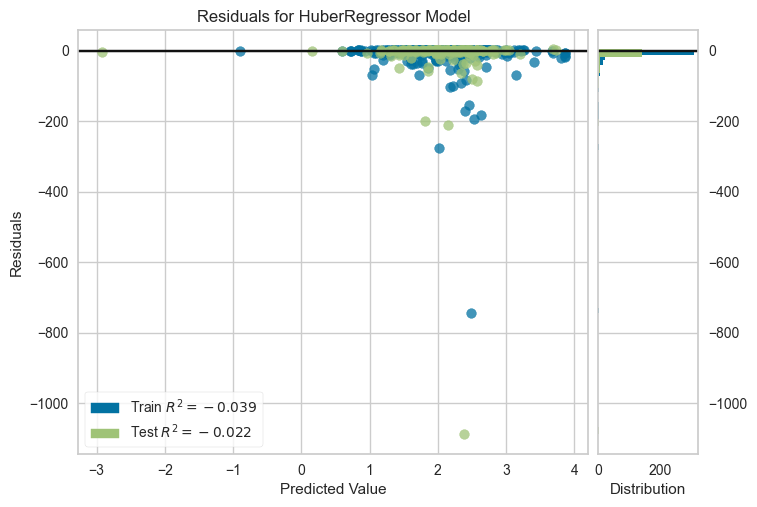

In [11]:
plot_model(huber_model)

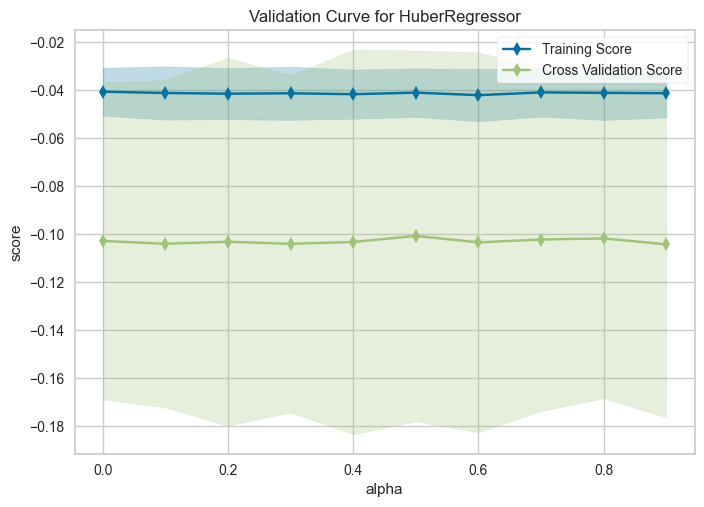

In [12]:
plot_model(huber_model,'vc')

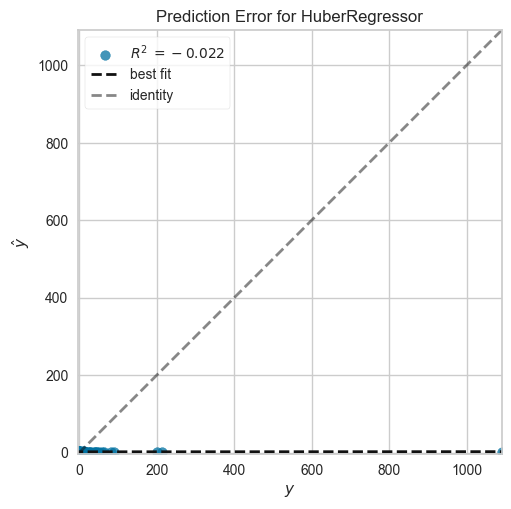

In [13]:
plot_model(huber_model,'error')

### Classification

In [14]:
def preprocessing(df):
  df=df.copy()
  df['area']=df['area'].apply(lambda x: 1 if x>0 else 0)

  return df

In [15]:
df=preprocessing(data)

In [16]:
df

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0
...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,1
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,1
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,1
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0


In [17]:
from pycaret.classification import *
reg2 = setup(data = df, target = 'area')

,Description,Value
0,Session id,6711
1,Target,area
2,Target type,Binary
3,Original data shape,"(517, 9)"
4,Transformed data shape,"(517, 9)"
5,Transformed train set shape,"(361, 9)"
6,Transformed test set shape,"(156, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [18]:
best_model=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.6065,0.6027,0.6564,0.6162,0.6297,0.2097,0.2135,0.1610
et,Extra Trees Classifier,0.5899,0.5851,0.6515,0.5980,0.6186,0.1758,0.1788,0.1330
lightgbm,Light Gradient Boosting Machine,0.5872,0.6031,0.6249,0.6056,0.6082,0.1725,0.1768,0.1390
knn,K Neighbors Classifier,0.5734,0.6137,0.5661,0.6021,0.5793,0.1477,0.1504,0.0270
gbc,Gradient Boosting Classifier,0.5734,0.5766,0.6234,0.5853,0.5981,0.1421,0.1448,0.0900
ada,Ada Boost Classifier,0.5568,0.5760,0.6240,0.5716,0.5930,0.1077,0.1107,0.0730
dt,Decision Tree Classifier,0.5512,0.5569,0.5716,0.5760,0.5670,0.1004,0.1026,0.0200
nb,Naive Bayes,0.5402,0.5819,0.9789,0.5337,0.6904,0.0396,0.0801,0.0170
qda,Quadratic Discriminant Analysis,0.5236,0.0000,1.0000,0.5236,0.6873,0.0000,0.0000,0.0190
dummy,Dummy Classifier,0.5236,0.5000,1.0000,0.5236,0.6873,0.0000,0.0000,0.0160


In [19]:
print(best_model)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=6711, verbose=0, warm_start=False)


In [20]:
adaboost_model=create_model('ada', fold = 20)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5263,0.4278,0.8000,0.5333,0.6400,0.0229,0.0272
1,0.5000,0.7222,0.7778,0.5000,0.6087,0.0000,0.0000
2,0.6111,0.4938,0.7778,0.5833,0.6667,0.2222,0.2357
3,0.4444,0.4321,0.3333,0.4286,0.3750,-0.1111,-0.1140
4,0.6111,0.7160,0.6667,0.6000,0.6316,0.2222,0.2236
5,0.5556,0.6173,0.5556,0.5556,0.5556,0.1111,0.1111
6,0.4444,0.5432,0.6667,0.4615,0.5455,-0.1111,-0.1240
7,0.3889,0.4074,0.5556,0.4167,0.4762,-0.2222,-0.2357
8,0.6667,0.7099,0.4444,0.8000,0.5714,0.3333,0.3721


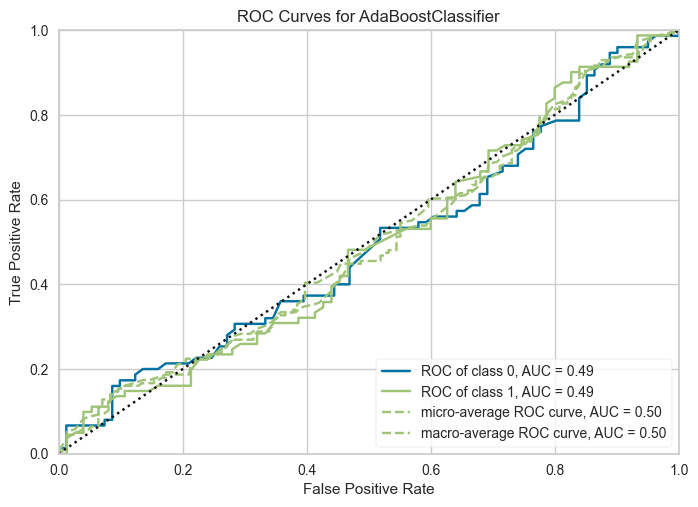

In [21]:
plot_model(adaboost_model)

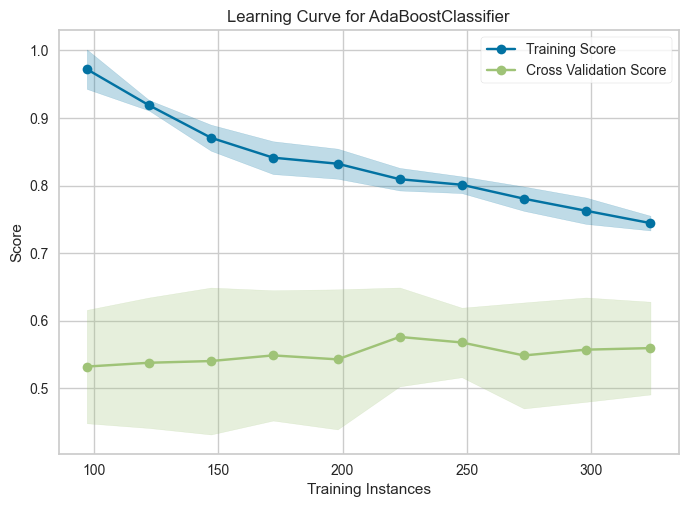

In [22]:
plot_model(adaboost_model,'learning')

In [23]:
tuned_adaboost=tune_model(adaboost_model,optimize='Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4865,0.4810,0.4211,0.5000,0.4571,-0.0233,-0.0236
1,0.6389,0.6389,0.5556,0.6667,0.6061,0.2778,0.2817
2,0.5833,0.5789,0.5263,0.6250,0.5714,0.1718,0.1742
3,0.5278,0.5186,0.2632,0.6250,0.3704,0.0838,0.1041
4,0.5278,0.5836,0.8947,0.5312,0.6667,0.0129,0.0197
5,0.5833,0.6393,0.6316,0.6000,0.6154,0.1615,0.1617
6,0.6111,0.6161,0.3684,0.7778,0.5000,0.2432,0.2891
7,0.5278,0.4768,0.4737,0.5625,0.5143,0.0613,0.0622
8,0.4722,0.4721,0.3158,0.5000,0.3871,-0.0364,-0.0393


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


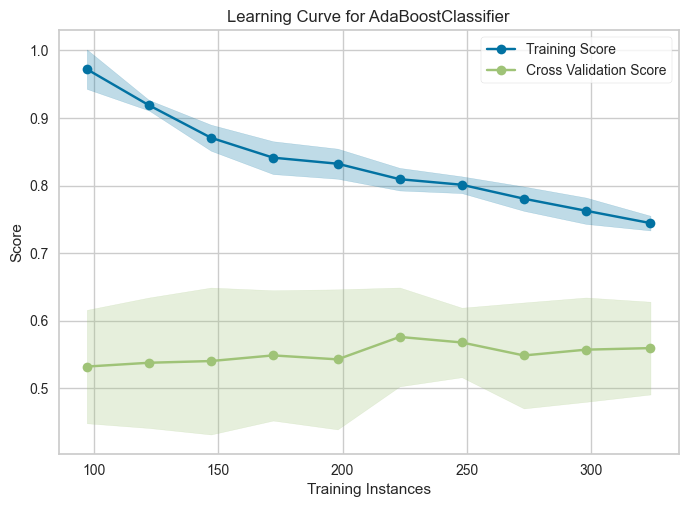

In [24]:
plot_model(tuned_adaboost,'learning')

In [25]:
save_model(tuned_adaboost,'forestfiremodel')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['FFMC', 'DMC', 'DC', 'ISI', 'temp',
                                              'RH', 'wind', 'rain'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose='deprecated'))),
                 ('categorical_imputer',
                  TransformerW...None, include=[],
                                     transformer